<a href="https://colab.research.google.com/github/bhanu608/-_-/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 : IRIS FLOWER CLASSIFICATION

In [ ]:
from sklearn.datasets import load_iris
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler


In [ ]:
# loading the iris data
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
iris.frame
# 0 => refers to setosa
# 1 => refers to versicolor
# 2 => refers to virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# standardising the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)# this conversion is required to perform kfold cross validation


In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 0)

# Training the data using non linear svm(kernal) and k-fold cross validation 

In [ ]:
clf = svm.SVC()
accuracy_list = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_train, y_train):
  x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
  clf.fit(x_train_fold, y_train_fold)
  accuracy_list.append(clf.score(x_test_fold, y_test_fold))
accuracy_before_testing = np.mean(accuracy_list)
print(accuracy_before_testing)

0.956060606060606


# Evaluting the model with test data

In [ ]:
y_pred = clf.predict(X_test)
accuracy_after_testing = accuracy_score(y_pred, y_test)
print("Accuracy before testing the model on unseen data : ",accuracy_before_testing)
print("Accuracy after testing the model on unseen data : ",accuracy_after_testing)

Accuracy before testing the model on unseen data :  0.956060606060606
Accuracy after testing the model on unseen data :  0.9736842105263158


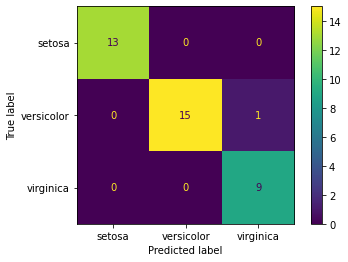

In [ ]:
class_names = iris["target_names"]
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

# Manual testing of the model

In [ ]:
# input the flower details
sepal_length = float(input("enter the sepal length : "))
sepal_width = float(input("enter the sepal width : "))
petal_length = float(input("enter the petal length : "))
petal_width = float(input("enter the petal width : "))
y_pred = clf.predict([[sepal_length,sepal_width, petal_length, petal_width]])
print("The flower is of type : ",class_names[y_pred])

enter the sepal length : 0.5
enter the sepal width : 0.39
enter the petal length : 1.0
enter the petal width : 0.5
The flower is of type :  ['virginica']
